In [90]:
import numpy as np
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

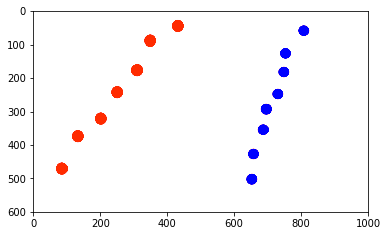

In [91]:
img = cv2.imread('cone_birdseye.png')
img2 = img.copy()

plt.imshow(img,cmap='gray')
plt.show()

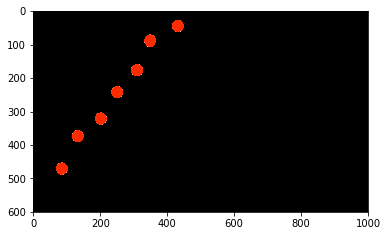

In [86]:
lower_red = np.array([255,40,0])
upper_red = np.array([255,255,180])

mask_red = cv2.inRange(img, lower_red, upper_red)
res_red = cv2.bitwise_and(img,img, mask= mask_red)

plt.imshow(res_red)
plt.show()

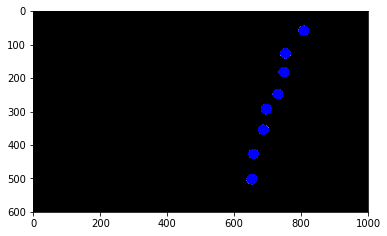

In [87]:
lower_blue= np.array([0,0,0])
upper_blue = np.array([138,255,255])

mask_blue = cv2.inRange(img, lower_blue, upper_blue)
res_blue = cv2.bitwise_and(img,img, mask= mask_blue)

plt.imshow(res_blue)
plt.show()

[[[748.5      184.5       18.506756]
  [693.5      290.5       13.28533 ]
  [810.5       60.5       13.28533 ]
  [753.5      128.5       18.506756]
  [730.5      250.5       18.506756]
  [687.5      356.5       18.506756]
  [658.5      429.5       18.506756]
  [653.5      504.5       18.506756]]]


Text(0.5, 1.0, 'Blue Cones')

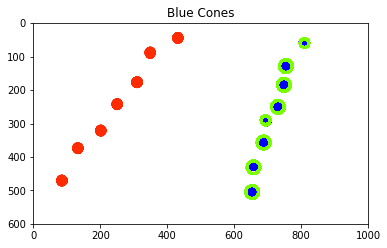

In [88]:
gray_blue = cv2.cvtColor(res_blue, cv2.COLOR_BGR2GRAY) 

circles_blue = cv2.HoughCircles(gray_blue, cv2.HOUGH_GRADIENT, 1, 20,
              param1=30,
              param2=15,
              minRadius=0,
              maxRadius=0)

print (circles_blue)
circles_blue = np.uint16(np.around(circles_blue))
for i in circles_blue[0,:]:
    cv2.circle(img,(i[0],i[1]),i[2],(120,255,0),10)
    cv2.circle(img,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(img)
plt.title('Blue Cones')

[[[314.5      183.5       10.977249]
  [435.5       38.5       13.72953 ]
  [349.5       88.5       18.343937]
  [133.5      373.5       18.343937]
  [251.5      242.5       18.343937]
  [ 86.5      470.5       18.343937]
  [202.5      320.5       18.343937]]]


Text(0.5, 1.0, 'Red Cones')

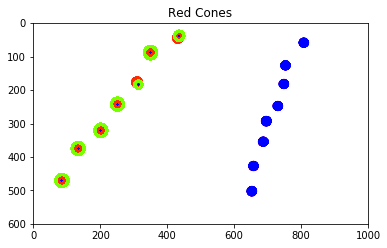

In [70]:
gray_red = cv2.cvtColor(res_red, cv2.COLOR_BGR2GRAY) 

circles_red = cv2.HoughCircles(gray_red, cv2.HOUGH_GRADIENT, 1, 20,
              param1=32,
              param2=14,
              minRadius=0,
              maxRadius=0)

print (circles_red)
circles_red = np.uint16(np.around(circles_red))
for i in circles_red[0,:]:
    cv2.circle(img2,(i[0],i[1]),i[2],(120,255,0),10)
    cv2.circle(img2,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(img2)
plt.title('Red Cones')

# 

[314, 436, 350, 134, 252, 86, 202]
[184, 38, 88, 374, 242, 470, 320]
[ 5.78063142e-04 -1.54171109e+00  5.91192696e+02]


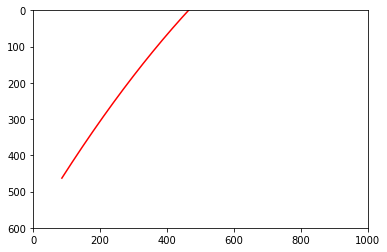

In [71]:
x = [point[0] for point in circles_red[0,:]]
y = [point[1] for point in circles_red[0,:]]
print (x)
print (y)

z = np.polyfit(x, y, 2)

print(z)

f = np.poly1d(z)
t = np.arange(86, 470, 1)

ax2 = plt.subplot()
ax2.axis([0, 1000, 600, 0])
ax2.plot(t, f(t),'r')
lineThickness = 2


plt.show()

[748, 694, 810, 754, 730, 688, 658, 654]
[184, 290, 60, 128, 250, 356, 430, 504]
[ 9.25688838e-03 -1.62041966e+01  7.11168928e+03]


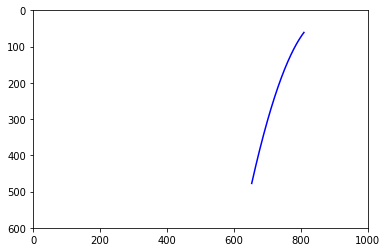

In [82]:
x2 = [point[0] for point in circles_blue[0,:]]
y2 = [point[1] for point in circles_blue[0,:]]
print (x2)
print (y2)

z2 = np.polyfit(x2, y2, 2)

print(z2)

f2 = np.poly1d(z2)
t2 = np.arange(653, 810, 1)

ax3 = plt.subplot()
ax3.axis([0, 1000, 600, 0])
ax3.plot(t2, f2(t2), 'b')
lineThickness = 2

plt.show()